### M1: Exploratory Data Analysis (EDA)

#### Objective: Automate data analysis and generate reports for deeper insights.

**Tasks:**
- Use an EDA tool that allows for automated data analysis and report generation (e.g., Pandas Profiling, Sweetviz, or D-Tale).
- Provide visual summaries of the dataset, including class distribution, missing values, and feature correlations.

In [15]:
!pip install pandas sweetviz dtale tensorflow ydata-profiling
!pip install --upgrade sweetviz


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import fashion_mnist
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import shap
import lime.lime_tabular
import pandas_profiling
import sweetviz as sv

# Load a smaller subset of the Fashion MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Reduce dataset size for faster execution
# X_train, y_train = X_train, y_train
# X_test, y_test = X_test[:500], y_test[:500]

# Flatten images for tabular analysis
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Convert to DataFrame
df_train = pd.DataFrame(X_train_flat)
df_train['label'] = y_train
df_test = pd.DataFrame(X_test_flat)
df_test['label'] = y_test

# M1: EDA Automation
print("Generating EDA Reports...")
profile = df_train.profile_report(title="Pandas Profiling Report", minimal=True)
profile.to_file("eda_report.html")

sweet_report = sv.analyze(df_train, pairwise_analysis='off')  # Explicitly setting pairwise_analysis to avoid long execution time
sweet_report.show_html("sweetviz_report.html")

print("EDA Reports Generated: 'eda_report.html' and 'sweetviz_report.html'")

# Visualizing class distribution
plt.figure(figsize=(10, 5))
sns.countplot(x=y_train, palette="viridis")
plt.title("Class Distribution")
plt.show()

Generating EDA Reports...


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

                                             |          | [  0%]   00:00 -> (? left)

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
EDA Reports Generated: 'eda_report.html' and 'sweetviz_report.html'


/var/folders/8s/cgfskf4s08sf0wtns9byv36r0000gn/T/ipykernel_70532/1287350690.py:42: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/8s/cgfskf4s08sf0wtns9byv36r0000gn/T/ipykernel_70532/1287350690.py:44: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



In [19]:
!pip uninstall sweetviz -y
!pip install sweetviz


Found existing installation: sweetviz 2.3.1
Uninstalling sweetviz-2.3.1:
  Successfully uninstalled sweetviz-2.3.1
  Using cached sweetviz-2.3.1-py3-none-any.whl.metadata (24 kB)
Using cached sweetviz-2.3.1-py3-none-any.whl (15.1 MB)


In [23]:
import numpy as np
import pandas as pd
import sweetviz as sv
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# Load Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Flatten images (28x28 → 784 features) and normalize pixel values (0-255 → 0-1)
x_train_flat = x_train.reshape(x_train.shape[0], -1) / 255.0
x_test_flat = x_test.reshape(x_test.shape[0], -1) / 255.0

# Convert to DataFrame
column_names = [f"pixel_{i}" for i in range(x_train_flat.shape[1])]
df_train = pd.DataFrame(x_train_flat, columns=column_names)
df_train["label"] = y_train  # Add class labels

# Convert class labels to human-readable names
class_names = [
    "T-shirt/Top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"
]
df_train["label_name"] = df_train["label"].map(lambda x: class_names[x])

# Generate Sweetviz report without internal attribute access
report = sv.analyze(df_train, pairwise_analysis='off')

# Save and display the report without trying to access any internal attributes
report.show_html("fashion_mnist_eda.html")


                                             |          | [  0%]   00:00 -> (? left)

Report fashion_mnist_eda.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


While, an EDA (Exploratory Data Analysis) tool like **PandasProfiling, Sweetviz, or D-Tale** can be used on the **Fashion MNIST dataset**, its utility would be somewhat limited due to the nature of the dataset.

### **Why It Might Be Useful**
1. **Basic Dataset Insights**  
   - You can use these tools to summarize dataset statistics, such as the number of samples per class, missing values (if any), and distributions of pixel intensity values (grayscale values ranging from 0 to 255).
   - It can provide correlations and summary statistics for each feature (though these are pixel values, which may not be as meaningful in isolation).

2. **Class Distribution and Label Insights**  
   - These tools can give you quick insights into the balance of class labels (e.g., whether any fashion categories are underrepresented).

3. **Pixel Intensity Distribution**  
   - Visualizing how pixel intensities are distributed across different classes might help understand potential biases in the dataset.

### **Why It Might Be Limited**
1. **Lack of Feature-Level Meaning**  
   - Fashion MNIST consists of **image data**, meaning most automated EDA tools designed for tabular data won't extract deep insights.
   - Since each pixel is treated as a separate feature, correlation and summary statistics (mean, std, skewness) on individual pixels may not be meaningful.

2. **No Direct Image Visualizations**  
   - EDA tools like PandasProfiling and Sweetviz are primarily designed for tabular data, so they don’t inherently visualize images. You would need **matplotlib/seaborn for actual image-based analysis** (e.g., displaying sample images or checking for noise/distortions).

3. **Better Alternatives Exist**  
   - Instead of using PandasProfiling or Sweetviz, a **custom EDA pipeline** involving:
     - **t-SNE or PCA** for dimensionality reduction to visualize image clusters
     - **Class-wise mean images** to observe structural similarities
     - **Edge detection or pixel intensity variance analysis**  
     would be more insightful.

### **Conclusion**
While automated EDA tools can provide **some useful statistical insights**, they won’t be as meaningful for **image datasets** like Fashion MNIST. A more tailored approach using **visualization techniques, feature extraction, and clustering methods** would yield deeper insights. If you want a more automated way to explore image data, tools like **TensorBoard, Facets, or HoloViews** might be better suited.

In [12]:
%matplotlib inline

/var/folders/8s/cgfskf4s08sf0wtns9byv36r0000gn/T/ipykernel_70532/1137693942.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




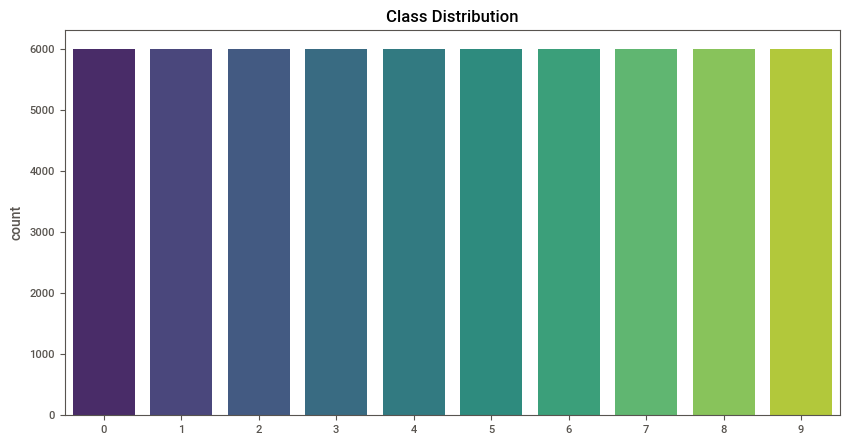

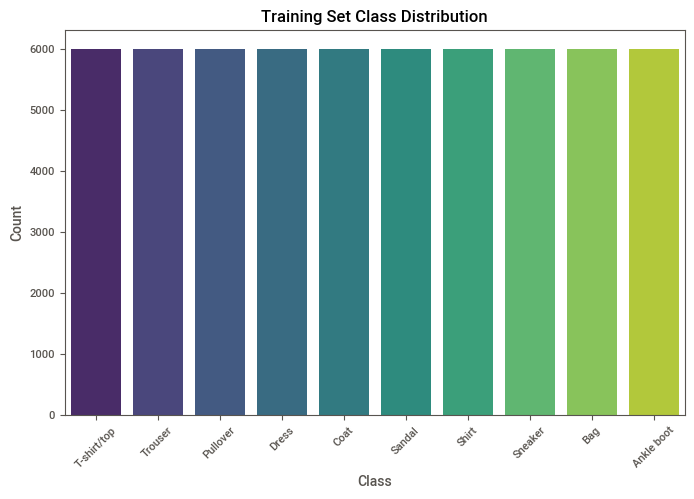

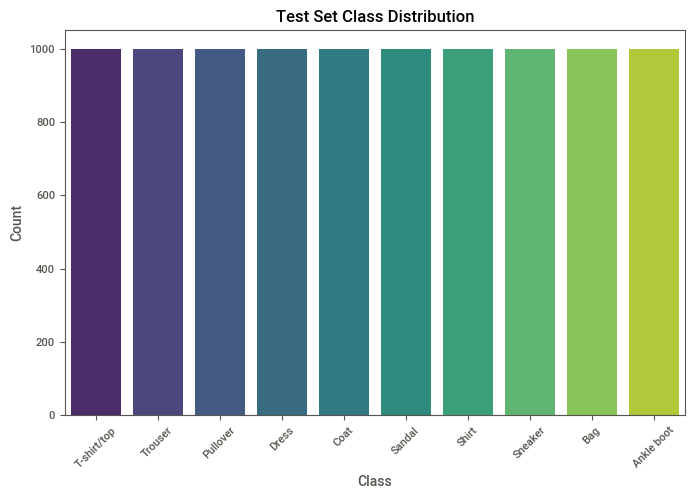

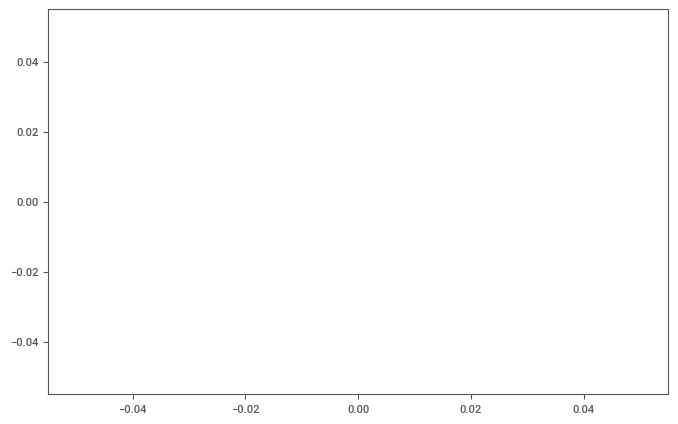

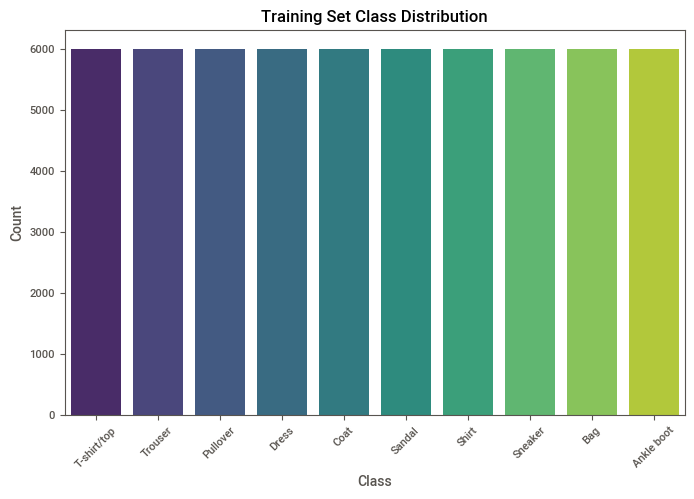

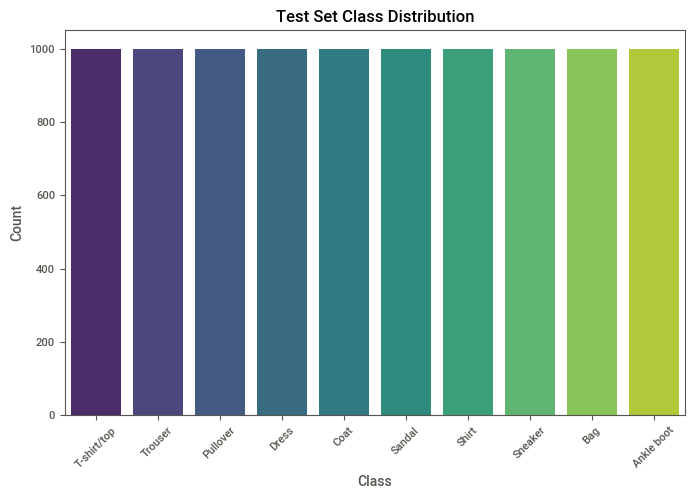

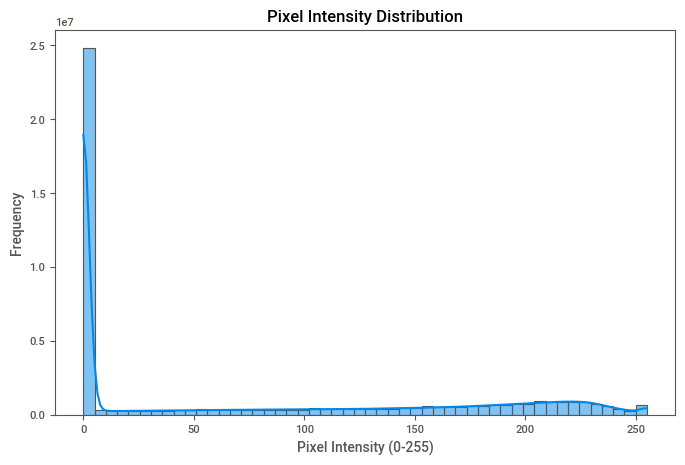

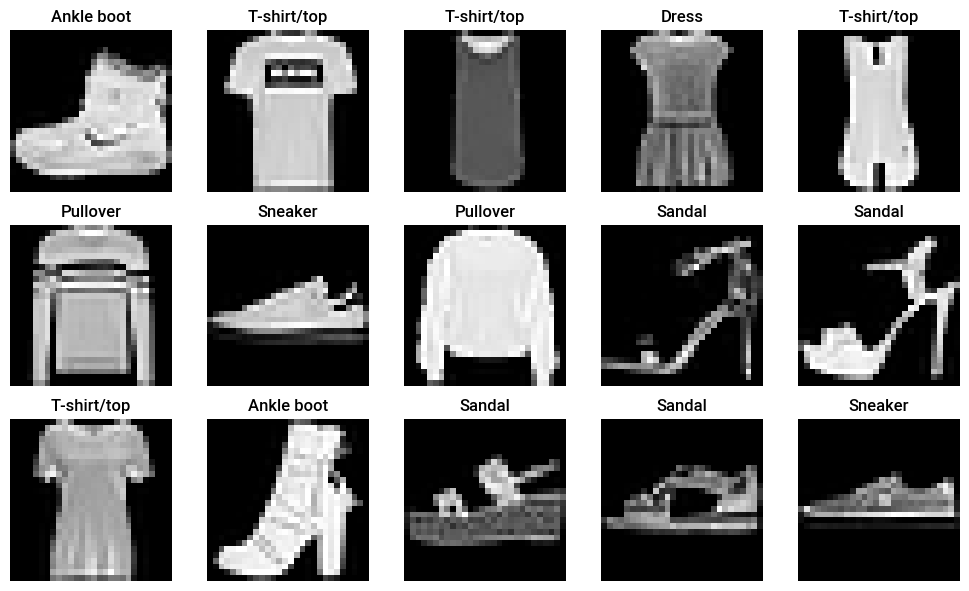

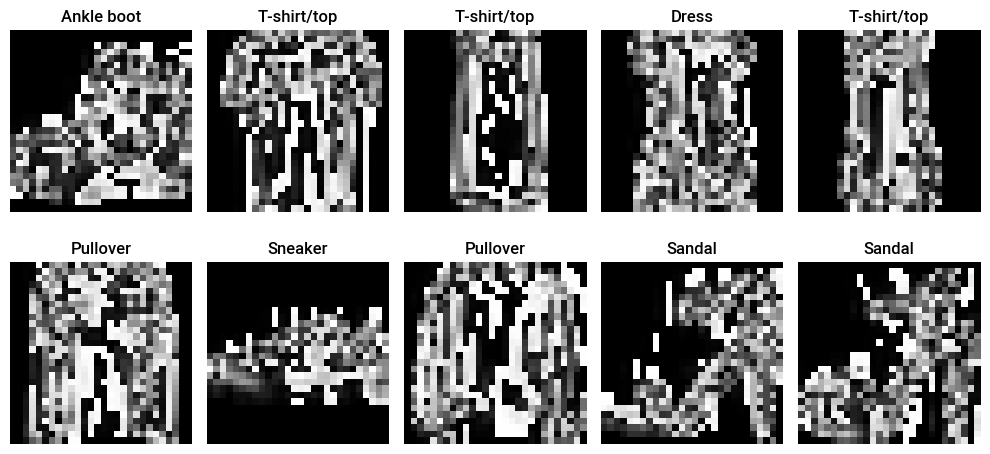

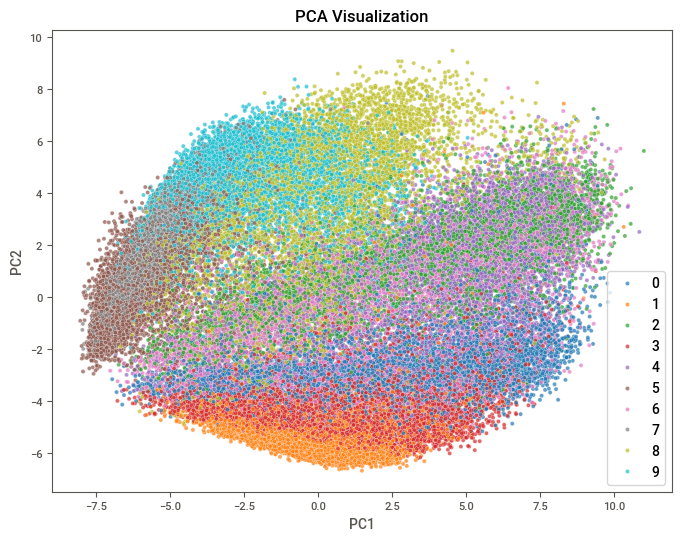

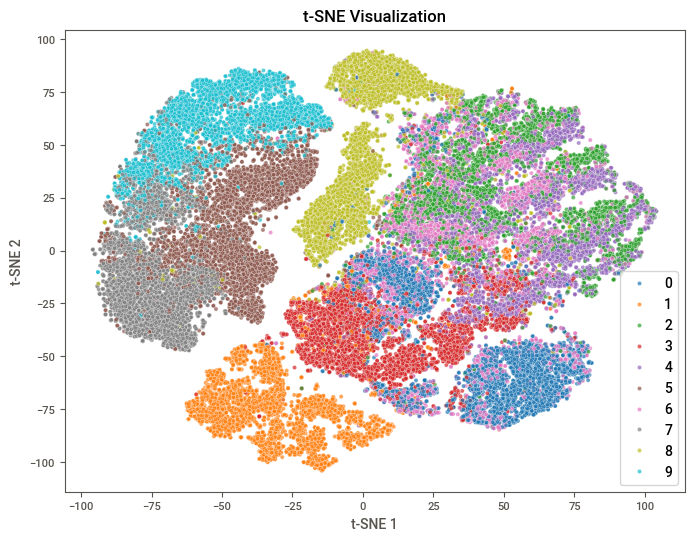

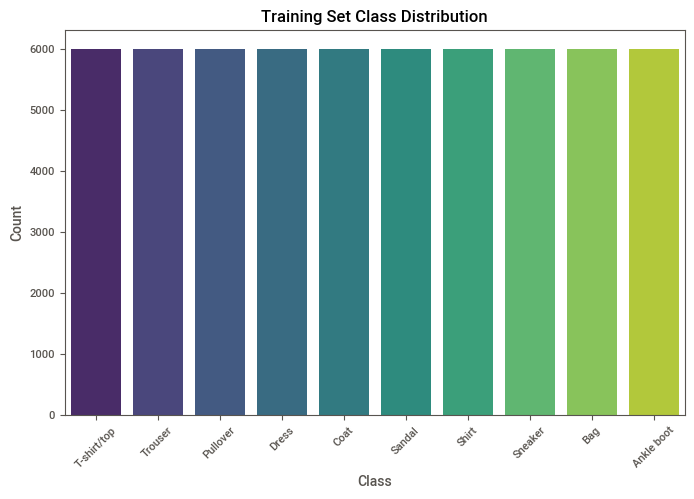

/var/folders/8s/cgfskf4s08sf0wtns9byv36r0000gn/T/ipykernel_70532/1137693942.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




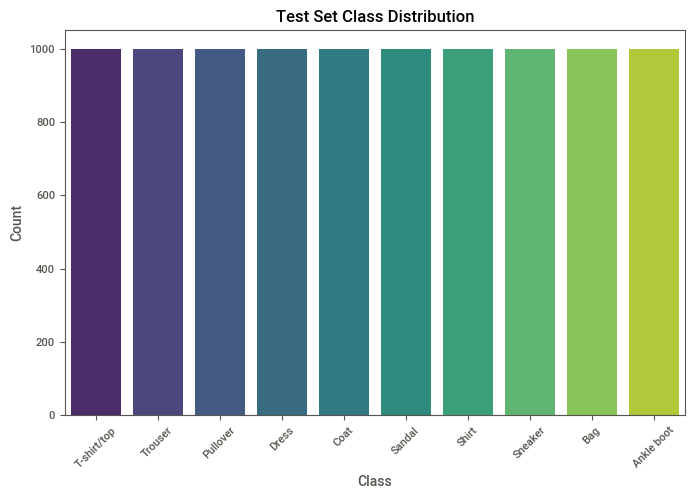

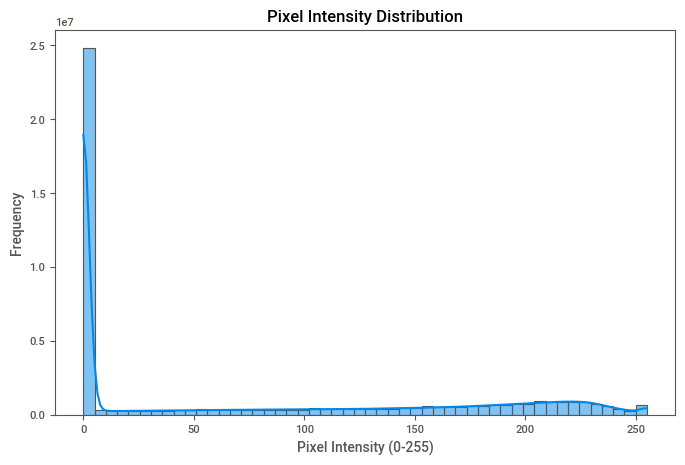

Mean Pixel Intensity: 72.94
Standard Deviation of Pixel Intensity: 90.02


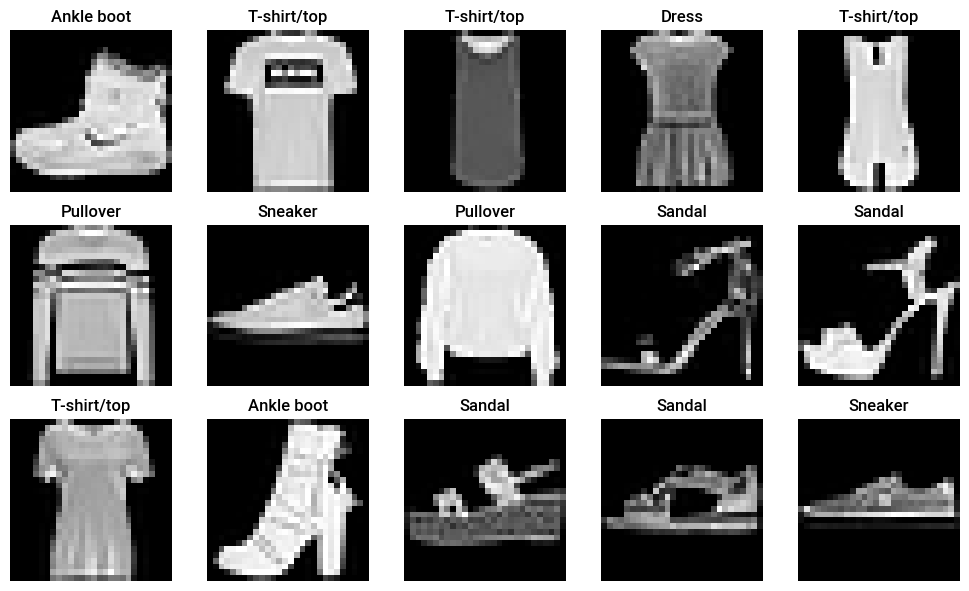

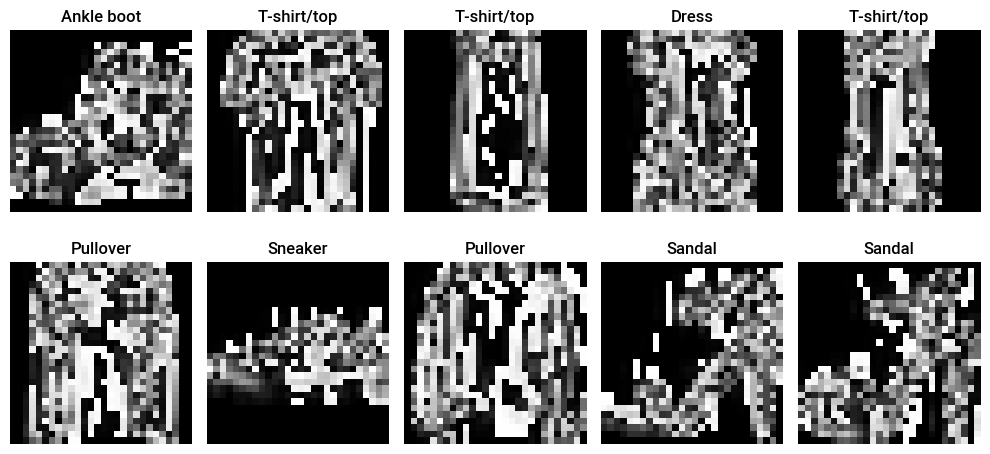

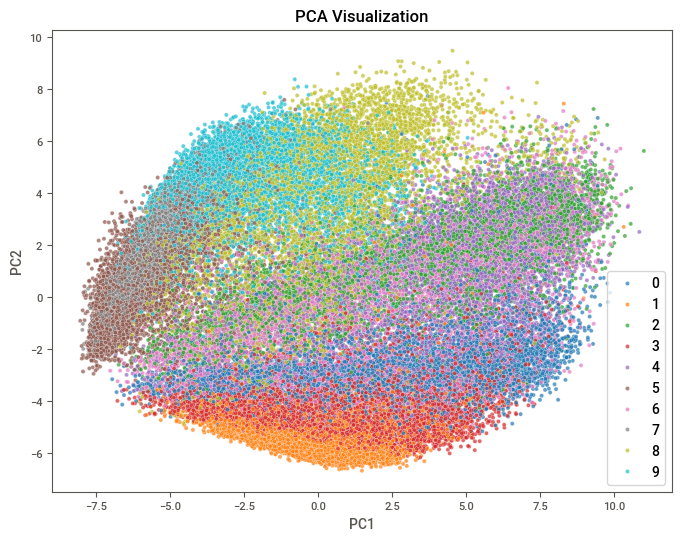

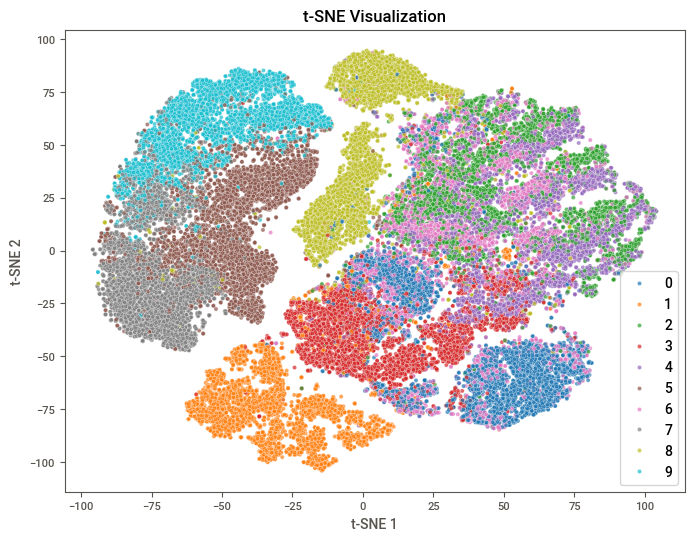

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import fashion_mnist
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Load dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Class names mapping
class_labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
                "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Function to plot class distribution
def plot_class_distribution(y_data, title):
    plt.figure(figsize=(8, 5))
    sns.countplot(x=y_data, palette="viridis")
    plt.xticks(ticks=np.arange(10), labels=class_labels, rotation=45)
    plt.title(title)
    plt.xlabel("Class")
    plt.ylabel("Count")
    plt.show()

# Plot class distribution
plot_class_distribution(y_train, "Training Set Class Distribution")
plot_class_distribution(y_test, "Test Set Class Distribution")

# Pixel intensity distribution
plt.figure(figsize=(8, 5))
sns.histplot(X_train.flatten(), bins=50, kde=True)
plt.title("Pixel Intensity Distribution")
plt.xlabel("Pixel Intensity (0-255)")
plt.ylabel("Frequency")
plt.show()

# Compute Mean and Standard Deviation of images
mean_intensity = np.mean(X_train)
std_intensity = np.std(X_train)
print(f"Mean Pixel Intensity: {mean_intensity:.2f}")
print(f"Standard Deviation of Pixel Intensity: {std_intensity:.2f}")

# Sample visualization
fig, axes = plt.subplots(3, 5, figsize=(10, 6))
axes = axes.flatten()
for i in range(15):
    axes[i].imshow(X_train[i], cmap="gray")
    axes[i].axis("off")
    axes[i].set_title(class_labels[y_train[i]])
plt.tight_layout()
plt.show()

# Edge detection using Sobel filter
from scipy.ndimage import sobel

edge_images = [sobel(X_train[i]) for i in range(10)]
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
axes = axes.flatten()
for i in range(10):
    axes[i].imshow(edge_images[i], cmap="gray")
    axes[i].axis("off")
    axes[i].set_title(class_labels[y_train[i]])
plt.tight_layout()
plt.show()

# PCA Analysis
X_train_flat = X_train.reshape(X_train.shape[0], -1) / 255.0
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_train_flat)  # Use subset for faster processing

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=y_train, palette="tab10", alpha=0.7)
plt.title("PCA Visualization")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# t-SNE for Non-linear Dimensionality Reduction
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(X_train_flat)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], hue=y_train, palette="tab10", alpha=0.7)
plt.title("t-SNE Visualization")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.show()
